#                                      Data Science Intern at LetsGrowMore

###       Task     :      3)Handwritten Equation solver using CNN
###        Level   :      ADVANCED LEVEL TASK
###        Batch  :      August 2k22
###        Author:      Akash Dandge

In [29]:
#importing required libraries
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import pickle

np.random.seed(1212)
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.datasets import mnist
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.models import model_from_json
from keras import backend as K
K.set_image_data_format('channels_last')

### Creating Dataset

In [2]:
def load_images_from_folder(folder):
    train_data = [] # empty list for storing the image sets
    for filename in os.listdir(folder):
        # Reading the images one by one using CV2 library
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        img =~ img
        if img is not None:
            ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
            ctrs, hie = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            cnt = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            w = int(28)
            h = int(28)
            max_i = 0
            for c in cnt:
                x,y,w,h = cv2.boundingRect(c)
                max_i = max(w*h,max_i)
                if max_i==(w*h):
                    max_x = x
                    max_y = y
                    max_w = w
                    max_h = h
            img_crop = thresh[max_y : max_y + max_h + 10, max_x : max_x + max_w + 10]
            img_resize = cv2.resize(img_crop, (28,28))
            img_resize = np.reshape(img_resize, (784, 1))
            train_data.append(img_resize)
    return train_data

In [3]:
data=[]

In [4]:
#assign '-'=10
data=load_images_from_folder('S:\\Projects\\LGMVIP- DataScience\\3.Handwritten equation solver using CNN\\extracted_images\\-')
len(data)
for i in range(0,len(data)):
    data[i]=np.append(data[i],['10'])
    
print(len(data))

33997


In [5]:
# Assigning '+' to column 11
data11=load_images_from_folder(r'S:\\Projects\LGMVIP- DataScience\\3.Handwritten equation solver using CNN\\extracted_images\+')

for i in range(0,len(data11)):
    data11[i]=np.append(data11[i],['11'])
data=np.concatenate((data,data11))
print(len(data))

59108


In [6]:
# Assigning '0' to column 0
data0=load_images_from_folder(r'S:\Projects\LGMVIP- DataScience\3.Handwritten equation solver using CNN\extracted_images\0')

for i in range(0,len(data0)):
    data0[i]=np.append(data0[i],['0'])
data=np.concatenate((data,data0))
print(len(data))

66022


In [7]:
data1=load_images_from_folder(r'S:\Projects\LGMVIP- DataScience\3.Handwritten equation solver using CNN\extracted_images\1')

for i in range(0,len(data1)):
    data1[i]=np.append(data1[i],['1'])
data=np.concatenate((data,data1))
print(len(data))

92542


In [8]:
data2=load_images_from_folder(r'S:\Projects\LGMVIP- DataScience\3.Handwritten equation solver using CNN\extracted_images\2')

for i in range(0,len(data2)):
    data2[i]=np.append(data2[i],['2'])
data=np.concatenate((data,data2))
print(len(data))

118683


In [9]:
data3=load_images_from_folder(r'S:\Projects\LGMVIP- DataScience\3.Handwritten equation solver using CNN\extracted_images\3')

for i in range(0,len(data3)):
    data3[i]=np.append(data3[i],['3'])
data=np.concatenate((data,data3))
print(len(data))

129592


In [10]:
data4=load_images_from_folder(r'S:\Projects\LGMVIP- DataScience\3.Handwritten equation solver using CNN\extracted_images\4')

for i in range(0,len(data4)):
    data4[i]=np.append(data4[i],['4'])
data=np.concatenate((data,data4))
print(len(data))

136988


In [11]:
data5=load_images_from_folder(r'S:\Projects\LGMVIP- DataScience\3.Handwritten equation solver using CNN\extracted_images\5')

for i in range(0,len(data5)):
    data5[i]=np.append(data5[i],['5'])
data=np.concatenate((data,data5))
print(len(data))

140533


In [12]:
data6=load_images_from_folder(r'S:\Projects\LGMVIP- DataScience\3.Handwritten equation solver using CNN\extracted_images\6')

for i in range(0,len(data6)):
    data6[i]=np.append(data6[i],['6'])
data=np.concatenate((data,data6))
print(len(data))

143651


In [13]:
data7=load_images_from_folder(r'S:\Projects\LGMVIP- DataScience\3.Handwritten equation solver using CNN\extracted_images\7')

for i in range(0,len(data7)):
    data7[i]=np.append(data7[i],['7'])
data=np.concatenate((data,data7))
print(len(data))

146560


In [14]:
data8=load_images_from_folder(r'S:\Projects\LGMVIP- DataScience\3.Handwritten equation solver using CNN\extracted_images\8')

for i in range(0,len(data8)):
    data8[i]=np.append(data8[i],['8'])
data=np.concatenate((data,data8))
print(len(data))

149628


In [15]:
data9=load_images_from_folder(r'S:\Projects\LGMVIP- DataScience\3.Handwritten equation solver using CNN\extracted_images\9')

for i in range(0,len(data9)):
    data9[i]=np.append(data9[i],['9'])
data=np.concatenate((data,data9))
print(len(data))

153365


In [16]:
data12=load_images_from_folder(r'S:\Projects\LGMVIP- DataScience\3.Handwritten equation solver using CNN\extracted_images\times')

for i in range(0,len(data12)):
    data12[i]=np.append(data12[i],['12'])
data=np.concatenate((data,data12))
print(len(data))

156616


### Creating dataframe from given data

In [17]:
df = pd.DataFrame(data, index=None)
df.to_csv(r'S:\Projects\LGMVIP- DataScience\3.Handwritten equation solver using CNN\train_final.csv', index=False)  #converting dataframe to csv file

### training set

In [18]:
df_train = pd.read_csv(r'S:\Projects\LGMVIP- DataScience\3.Handwritten equation solver using CNN\train_final.csv', index_col = False)
labels = df_train[['784']]

In [19]:
df_train.drop(df_train.columns[[784]], axis=1, inplace=True)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


In [20]:
labels = np.array(labels)

In [21]:
from keras.utils.np_utils import to_categorical
cat = to_categorical(labels, num_classes=13)
print(cat)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [22]:
print(cat[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [23]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


In [31]:
lst = []
for i in range(156616):    
    lst.append(np.array(df_train[i:i+1]).reshape(28,28, 1))

In [32]:
np.random.seed(7)

### Modal Building

In [33]:
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 15)          0         
                                                                 
 flatten (Flatten)           (None, 375)               0

### Train the Modal

In [35]:
from keras.models import model_from_json
model.fit(np.array(lst), cat, epochs=10, batch_size=200,shuffle=True,verbose=1)

Epoch 1/10
784/784 [==============================] - 103s 114ms/step - loss: 0.5005 - accuracy: 0.8837
Epoch 2/10
784/784 [==============================] - 90s 114ms/step - loss: 0.1033 - accuracy: 0.9699
Epoch 3/10
784/784 [==============================] - 87s 110ms/step - loss: 0.0658 - accuracy: 0.9811
Epoch 4/10
784/784 [==============================] - 87s 111ms/step - loss: 0.0503 - accuracy: 0.9853
Epoch 5/10
784/784 [==============================] - 92s 118ms/step - loss: 0.0420 - accuracy: 0.9879
Epoch 6/10
784/784 [==============================] - 105s 135ms/step - loss: 0.0354 - accuracy: 0.9896
Epoch 7/10
784/784 [==============================] - 106s 135ms/step - loss: 0.0307 - accuracy: 0.9908
Epoch 8/10
784/784 [==============================] - 99s 126ms/step - loss: 0.0284 - accuracy: 0.9915
Epoch 9/10
784/784 [==============================] - 96s 123ms/step - loss: 0.0264 - accuracy: 0.9921
Epoch 10/10
784/784 [==============================] - 95s 122ms/step 

In [36]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

### Making Prediction

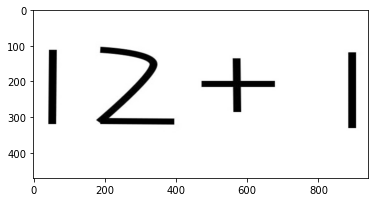

In [62]:
img = cv2.imread(r'S:\Projects\LGMVIP- DataScience\3.Handwritten equation solver using CNN\\test.jpeg',cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
if img is not None:
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,hie=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    final_rect=[i for i in rects if i not in dump_rect]
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        

        im_resize = cv2.resize(im_crop,(28,28))
        #plt.imshow(cv2.cvtColor(im_resize,cv2.COLOR_BGR2RGB))
        im_resize=np.reshape(im_resize,(1,28,28))
        train_data.append(im_resize)

In [63]:
s=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        s=s+'-'
    if(result[0]==11):
        s=s+'+'
    if(result[0]==12):
        s=s+'*'
    if(result[0]==0):
        s=s+'0'
    if(result[0]==1):
        s=s+'1'
    if(result[0]==2):
        s=s+'2'
    if(result[0]==3):
        s=s+'3'
    if(result[0]==4):
        s=s+'4'
    if(result[0]==5):
        s=s+'5'
    if(result[0]==6):
        s=s+'6'
    if(result[0]==7):
        s=s+'7'
    if(result[0]==8):
        s=s+'8'
    if(result[0]==9):
        s=s+'9'
    
print("Test Result:{}={}".format(s,eval(s)))

1/1 [==============================] - 0s 73ms/step
Test Result:12+1=13
